### Introdução a análise de Texto com o R

#### prof. Davi Rocha

Vamos aqui iniciar a analise de textos usando o R e usando uma base de dados que possuem informações de tweets. A ideia é analisar informações dessa base.

In [114]:
library(tidyverse) #pacote principal

In [115]:
twitter_data <- read_rds('twitter_data.rds') #dados de twitter

In [116]:
##imprimir os dados:
print(twitter_data)

# A tibble: 7,044 x 6
   tweet_id date                complaint_label tweet_text usr_followers_c~
      <dbl> <dttm>              <chr>           <chr>                 <dbl>
 1  4.77e17 2014-06-12 00:07:25 Non-Complaint   "1. Haned~              152
 2  4.77e17 2014-06-12 00:12:30 Non-Complaint   "My plane~              184
 3  4.77e17 2014-06-12 00:13:56 Complaint       "So appar~              136
 4  4.77e17 2014-06-12 00:16:09 Non-Complaint   "Je suppo~                1
 5  4.77e17 2014-06-12 00:17:37 Non-Complaint   "Dear @Ce~               67
 6  4.77e17 2014-06-12 00:18:49 Complaint       "Boo @Del~              138
 7  4.77e17 2014-06-12 00:26:42 Non-Complaint   "#PALFlie~               21
 8  4.77e17 2014-06-12 00:31:08 Complaint       "@JetBlue~              133
 9  4.77e17 2014-06-12 00:35:27 Non-Complaint   "Celebrat~              607
10  4.77e17 2014-06-12 00:46:47 Non-Complaint   "Don't do~              165
# ... with 7,034 more rows, and 1 more variable: usr_verified <lgl

In [117]:
##colunas:
names(twitter_data)

[1] "tweet_id"            "date"                "complaint_label"    
[4] "tweet_text"          "usr_followers_count" "usr_verified"

Nesse data frame temos 6 colunas:

- **tweet_id** -  id do twitter

- **date** - data do tweet

- **complaint_label** - se é um tweet de reclamação ou não

- **tweet_text** - texto do tweet

- **usr_followers_count** - quantidade de seguidores

- **usr_verified** - se o usuário é verificado ou não 

In [138]:
#Impressão dos tweets de reclamação:
head(
    twitter_data %>%
            filter(complaint_label=='Complaint'))

tweet_id,date,complaint_label,tweet_text,usr_followers_count,usr_verified
<dbl>,<dttm>,<chr>,<chr>,<dbl>,<lgl>
4.768800e+17,2014-06-12 00:13:56,Complaint,So apparently @USAirways changes departing gates on flights in Philly without any type of notification #unsatisfiedcustomer,136,FALSE
4.768813e+17,2014-06-12 00:18:49,Complaint,Boo @Delta just cancelled the flight that they had already rescheduled. Now my itinerary is all weird online &amp; lost my upgrade position. :(,138,FALSE
4.768844e+17,2014-06-12 00:31:08,Complaint,@JetBlue you need to get your act together and get way nicer staff in the cancun airport were on an over 7 hr delay and they are awful <U+0001F44E><U+0001F44E><U+0001F44E>,133,FALSE
4.768889e+17,2014-06-12 00:49:18,Complaint,@TheRealKerstin gave up on @USAirways after 2:48 hours on hold,221,FALSE
4.768903e+17,2014-06-12 00:54:32,Complaint,@AmericanAir worst customer service in JAX airport today. Flight delayed 10x and only 2 staff to help stranded passengers. Whole day wasted!,10,FALSE
4.768913e+17,2014-06-12 00:58:36,Complaint,I strongly advise avoiding @united for your flights. What a pathetic excuse of a company,158,FALSE


In [139]:
#Agrupamento dos dados pela coluna complaint_label
#Calculo da media, minimo, e numero de seguidores
twitter_data %>%
            group_by(complaint_label) %>%
                        summarise( 
                            avg_followers = mean(usr_followers_count),
                            min_followers = min(usr_followers_count),
                            max_followers = max(usr_followers_count))

`summarise()` ungrouping output (override with `.groups` argument)


complaint_label,avg_followers,min_followers,max_followers
<chr>,<dbl>,<dbl>,<dbl>
Complaint,3234.339,0,1259803
Non-Complaint,4487.331,0,2200851


In [121]:
#Filtro dos dados por tweets que são de reclamações
#Contagem do numero de usuários verificados e não verificados

In [122]:
twitter_data %>% 
            filter(complaint_label=='Complaint') %>%
                                                    count(usr_verified)

usr_verified,n
<lgl>,<int>
FALSE,1650
TRUE,26


In [123]:
# Dados agrupados por usuários verificados ou não
# Calculo do numero medio  de seguidores para cada tipo de usuario. Essa coluna será chamada avg_followers.
# Contagem do numero de usuarios verificados e não verificados. Essa coluna sera chamada n.

In [124]:
twitter_data %>%
            group_by(usr_verified) %>%
                                    summarise(avg_followers=mean(usr_followers_count),
                                             n=n())

`summarise()` ungrouping output (override with `.groups` argument)


usr_verified,avg_followers,n
<lgl>,<dbl>,<int>
FALSE,1999.189,6927
TRUE,133849.291,117


In [140]:
### Tokenização  limpeza e contagem

#carregamento dos pacotes tidyverse e tidytext .
#Tokenização dos twetts da coluna tweet_text.
#Calculo da quantidade de palavras usando texto tokenizado.
#Ordenando a contagem em ordem decrescente.

In [141]:
library(tidyverse)
library(tidytext)

In [142]:
## Tokenização:criada a coluna word onde estão todas as palavras
tidy_twitter <- twitter_data %>%
            unnest_tokens(word,tweet_text)  

In [143]:
head(tidy_twitter)
tail(tidy_twitter)

tweet_id,date,complaint_label,usr_followers_count,usr_verified,word
<dbl>,<dttm>,<chr>,<dbl>,<lgl>,<chr>
4.768784e+17,2014-06-12 00:07:25,Non-Complaint,152,FALSE,1
4.768784e+17,2014-06-12 00:07:25,Non-Complaint,152,FALSE,haneda
4.768784e+17,2014-06-12 00:07:25,Non-Complaint,152,FALSE,2
4.768784e+17,2014-06-12 00:07:25,Non-Complaint,152,FALSE,i'll
4.768784e+17,2014-06-12 00:07:25,Non-Complaint,152,FALSE,go
4.768784e+17,2014-06-12 00:07:25,Non-Complaint,152,FALSE,to


tweet_id,date,complaint_label,usr_followers_count,usr_verified,word
<dbl>,<dttm>,<chr>,<dbl>,<lgl>,<chr>
4.87268e+17,2014-07-10 16:11:55,Complaint,213,FALSE,run
4.87268e+17,2014-07-10 16:11:55,Complaint,213,FALSE,out
4.87268e+17,2014-07-10 16:11:55,Complaint,213,FALSE,of
4.87268e+17,2014-07-10 16:11:55,Complaint,213,FALSE,food
4.87268e+17,2014-07-10 16:11:55,Complaint,213,FALSE,that's
4.87268e+17,2014-07-10 16:11:55,Complaint,213,FALSE,tacky


In [129]:
# Contagem e ordenando em ordem decrescente
tidy_twitter %>% 
            count(word) %>%
                        arrange(desc(n)) 

word,n
<chr>,<int>
to,2834
the,2212
a,1989
i,1752
t.co,1405
http,1361
for,1356
you,1345
on,1289


In [130]:
#Limpando e contandoCleaning and counting
#Remova as palavras irrelevantes(stop words) para explorar o conteúdo apenas dos tweets de companhias aéreas classificados como
#reclamações(complaints) no twitter_data..

In [131]:
##Tokenização dos tweets do twitter_data. 
##Remover as stop words da base twitter_data ja tokenizada
##Filtrar dados de reclamação somente(complaints)
##Contar as palavras e ordenar em ordem decrescente por quantidade(n)

In [144]:
tidy_twitter <- twitter_data %>%
            unnest_tokens(word,tweet_text) %>%
                                anti_join(stop_words)

Joining, by = "word"


In [145]:
tidy_twitter %>% 
                filter(complaint_label=='Complaint') %>%
                                                      count(word) %>%
                                                                    arrange(desc(n))

word,n
<chr>,<int>
flight,459
united,362
americanair,294
usairways,207
time,167
delta,141
service,137
2,129
delayed,123



Parece que as reclamações incluem referências frequentes a tempo, atrasos e serviço. No entanto, existem simplesmente várias companhias aéreas específicas referenciadas. Eles podem ser considerados palavras de interrupção específicas para esses dados, e veremos como removê-los abaixo

#### Visualização de reclamações

Acima fizemos contagens de palavras de reclamação. Agora vamos visualizar essas contagens de palavras com um gráfico de barras.

Os pacotes tidyverse e tidytext já foram carregados. twitter_data foi tokenizado e as palavras de parada padrão foram removidas.


Vamos manter somente palavras que tem frequencia mior que 100, chamaremos esses dados  de word_count.
E criaremos um gráfico de barras.


In [146]:
word_counts<- tidy_twitter %>%
            filter(complaint_label == "Complaint") %>%
                                                 count(word) %>%
                                                        filter(n>100)

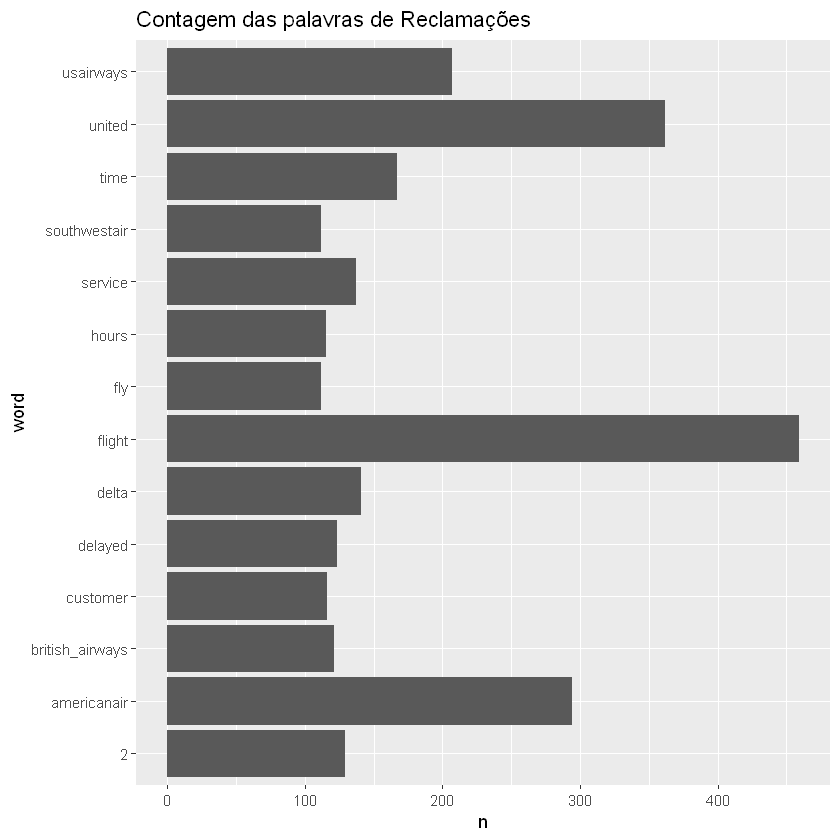

In [152]:
ggplot(word_counts, aes(x=word, y=n))+ geom_col()+ coord_flip() + ggtitle('Contagem das palavras de Reclamações')

In [153]:
word_counts2<- tidy_twitter %>% filter(complaint_label=='Non-Complaint') %>%
                                count(word) %>% filter(n>150)


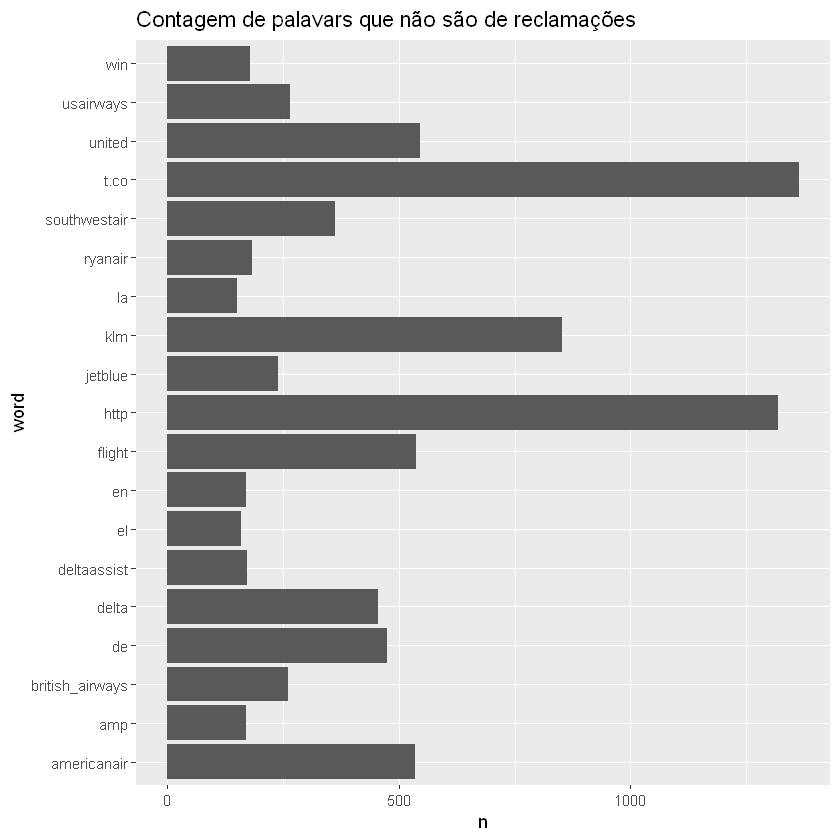

In [154]:
ggplot(word_counts2, aes(x=word, y=n))+ geom_col() + coord_flip()+ ggtitle('Contagem de palavars que não são de reclamações')

**Keep calm and analysing data!**